<a href="https://colab.research.google.com/github/haosong830/CS6440/blob/main/project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import sklearn_pandas as skp
import sklearn as skl

In [17]:
#Descriptive analysis of datasets
cases = pd.read_csv("/content/United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv")
vac = pd.read_csv("/content/United States vaccination data.csv")

In [120]:
#clean the tables
#only keep columns "date" and "people_fully_vaccinated" columns for the vaccination table
vac_clean = vac[["date","people_fully_vaccinated"]]
#replace 'NaN' by 0
vac_clean = vac_clean.fillna(0)
vac_clean.head(20)

#extract "submission_date", "new case", and "new death" columns of the case and death table
cases_clean = cases[["submission_date","new_case","new_death"]]
#replace 'NaN' by 0
cases_clean = cases_clean.fillna(0)
#sort the date with earlier dates coming first
cases_clean['submission_date'] = pd.to_datetime(cases_clean['submission_date'])
cases_clean = cases_clean.sort_values('submission_date')
#reset the indices and remove the old indices
cases_clean = cases_clean.reset_index()
cases_clean = cases_clean[['submission_date','new_case','new_death']]
#add up daily new cases and new deaths by date
cases_clean = cases_clean.groupby(['submission_date']).sum()

In [121]:
cases_clean.head(20)

,new_case,new_death
submission_date,,
2020-01-22,1,0
2020-01-23,0,0
2020-01-24,1,0
2020-01-25,0,0
2020-01-26,3,0
2020-01-27,0,0
2020-01-28,0,0
2020-01-29,0,0
2020-01-30,0,0


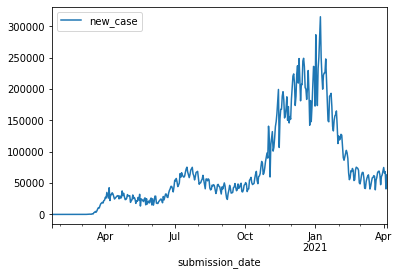

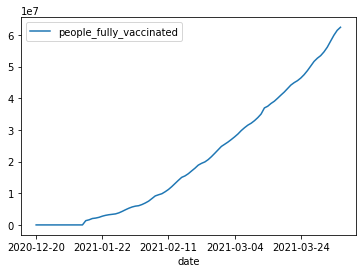

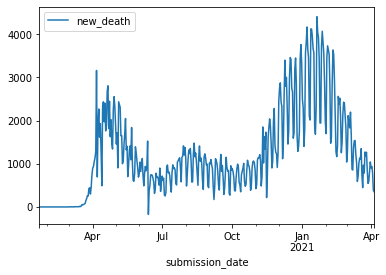

In [81]:
#plot the three tables
cases_clean.plot(y='new_case')
vac_clean.plot(x='date')
cases_clean.plot(y='new_death')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


99558.45000000001


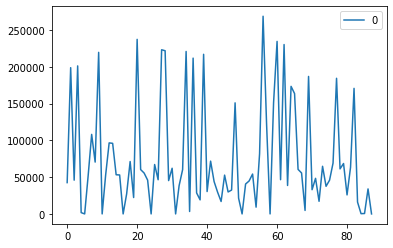

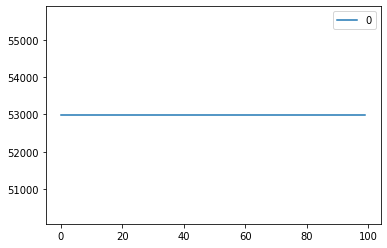

In [282]:
#train the model for new daily cases using GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import datetime as dt
from sklearn.metrics import max_error
#add a 'date' column to case table, so we can convert it to categorical values
cases_clean['date'] = cases_clean.index
#map Timestamp 'date' column to ordinal values
cases_clean['date']=cases_clean['date'].map(dt.datetime.toordinal)

#train the model
x = cases_clean['date'].to_numpy().reshape(-1,1)
y = cases_clean['new_case'].to_numpy().reshape(-1,1)
#split train test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=0)
#set up the regressor
rf = skl.ensemble.RandomForestRegressor()
#fit the training data
rf.fit(x_train,y_train)
#predict the test data and see the error
y_pred = rf.predict(x_test)
df = pd.DataFrame(data=y_pred.ravel())
error = max_error(y_test,y_pred)
print(error)
df.plot(legend='y_test')
#predict the subsequent dates
start_date = cases_clean['date'][len(cases_clean['date']) - 1]
end_date = start_date + 100
date = np.array(range(start_date,end_date)).reshape(-1,1)
pred = rf.predict(date)
df = pd.DataFrame(data=pred)
df.plot()